# Bike Sharing Dataset

# Business Problem Understanding

## Context
Industri penyewaan sepeda berkembang pesat, terutama dengan adanya layanan berbagi sepeda di berbagai kota. Perusahaan penyedia layanan ini memiliki keinginan untuk meningkatkan efisiensi operasionalnya melalui prediksi permintaan sepeda pada waktu tertentu. Data yang dimiliki oleh perusahaan tersebut terdapat dalam dataset data_bike_sharing.csv, yang mencakup informasi seperti waktu, cuaca, dan jumlah sepeda yang dipinjam.

## Problem Statement
Mengembangkan model prediksi regresi machine learning untuk memperkirakan jumlah total sepeda yang akan dipinjam pada waktu tertentu, guna meningkatkan efisiensi operasional perusahaan penyewaan sepeda.

Dengan memiliki **prediksi jumlah total sepeda yang akan dipinjam**, perusahaan dapat mengoptimalkan penempatan sepeda dan efisiensi operasional, sehingga mengurangi kelebihan atau kekurangan stok sepeda dan meminimalkan biaya operasional yang terkait.

## Goals

- Mengembangkan model prediksi regresi machine learning untuk memproyeksikan jumlah total sepeda yang dipinjam pada waktu tertentu, guna meningkatkan efisiensi dan optimalisasi operasional perusahaan penyewaan sepeda.



## Analytic Approach

**Pemilihan Variabel**: Memilih variabel yang signifikan untuk membangun model prediksi jumlah total sepeda.

**Pemisahan Dataset**: Membagi dataset menjadi set pelatihan dan set pengujian.

**Pembangunan Model Regresi**: Menggunakan algoritma regresi untuk memprediksi jumlah total sepeda.

**Penyetelan Model**: Penyesuaian hiperparameter untuk meningkatkan kinerja model.

**Evaluasi Kinerja**: Menggunakan metrik seperti RMSE, MAPE, R-Squared untuk menilai akurasi prediksi.

**Implementasi Model**: Mengintegrasikan model ke dalam sistem untuk memberikan perkiraan jumlah total sepeda secara real-time, dengan fokus pada efisiensi operasional dan optimalisasi sumber daya.






## Metric Evaluation

- RMSE (Root Mean Squared Error):

  - Alasan: RMSE memberikan ukuran kesalahan rata-rata antara prediksi dan nilai sebenarnya. Dalam konteks ini, kita ingin meminimalkan kesalahan absolut untuk memastikan prediksi jumlah total sepeda yang dipinjam mendekati dengan akurat.

- MAPE (Mean Absolute Percentage Error):

  - Alasan: MAPE mengukur kesalahan relatif dalam persentase. Dengan menggabungkan aspek relatif, metrik ini membantu kita menilai akurasi prediksi dalam konteks proporsi. Dalam industri penyewaan sepeda, kesalahan dalam memproyeksikan persentase dapat memberikan wawasan lebih baik terkait dampak operasional.

- R-squared (R2):

  - Alasan: R-squared mengukur seberapa baik model kita dapat menjelaskan variasi dalam data. Dalam konteks ini, kita ingin memastikan bahwa model dapat menjelaskan sebagian besar variasi dalam jumlah total sepeda yang dipinjam. R-squared memberikan gambaran holistik tentang performa model secara keseluruhan.

Dengan menggunakan kombinasi metrik RMSE, MAPE, dan R-squared, kita dapat mengevaluasi model dari berbagai perspektif, termasuk akurasi absolut, akurasi relatif, dan kemampuan model dalam menjelaskan variasi data. Kombinasi metrik ini mendukung tujuan untuk meningkatkan efisiensi operasional dan optimalisasi sumber daya dalam perusahaan penyewaan sepeda.


## Stakeholders

- Manajemen Perusahaan Penyewaan Sepeda:

  - Minat: Efisiensi operasional, optimalisasi sumber daya, pengurangan biaya operasional.
  - Keuntungan: Keputusan yang lebih baik terkait penempatan sepeda, perawatan sepeda, dan perencanaan sumber daya manusia.

- Petugas Operasional dan Logistik:

  - Minat: Penempatan sepeda yang efisien, manajemen inventaris yang optimal.
  - Keuntungan: Pengurangan kelebihan atau kekurangan stok, perencanaan perawatan sepeda yang lebih efektif.

# Data Understanding
* Dataset mengandung informasi tentang penyewaan sepeda yang di rentalkan dari 2011 sampai 2012
* setiap record mencatat kondisi dan volume peminjaman sepeda pada suatu waktu tertentu.

**Attributes Information**
 
| Kolom      | Deskripsi                                        |
|------------|--------------------------------------------------|
| dteday   | tanggal (yyyy-mm-dd)          |
| hr     | Jam (0 sampai 23) |
| season     | Musim dalam setahun (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin) |
| holiday    | Hari libur (0: bukan hari libur, 1: hari libur)  |
| weathersit    | Kondisi cuaca (1: Cerah, 2: Berawan, 3: Hujan Ringan/Hujan Salju Ringan, 4: Badai) |
| temp       | Suhu dalam derajat Celsius                       |
| atemp      | Suhu perasaan (suhu merasakan) dalam derajat Celsius |
| hum   | Kelembapan relatif                               |
| casual     | Jumlah sepeda yang dipinjam oleh penyewa casual  |
| registered | Jumlah sepeda yang dipinjam oleh penyewa terdaftar |
| cnt      | Jumlah total sepeda yang dipinjam (casual + registered) |


In [1]:
# Import Dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('data_bike_sharing.csv')

In [3]:
# Menampilkan 5 baris pertama pada dataframe
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
# info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Terdapat 1265 baris dan 11 kolom yang tidak memiliki missing value

### Menampilkan gambaran informasi dari setiap Kolom

In [5]:
df_description = []

for i in df.columns:
    df_description.append([i,df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].sample(3).values])

df_info = pd.DataFrame(df_description, columns = ['kolom', 'tipe data', 'null', 'null_persentase', 'jumlah_unik','sample_unik'])
df_info

,kolom,tipe data,null,null_persentase,jumlah_unik,sample_unik
0,dteday,object,0,0.0,731,"[2012-07-08, 2011-08-02, 2011-08-16]"
1,hum,float64,0,0.0,89,"[0.56, 0.57, 0.73]"
2,weathersit,int64,0,0.0,4,"[2, 2, 1]"
3,holiday,int64,0,0.0,2,"[0, 0, 0]"
4,season,int64,0,0.0,4,"[4, 4, 3]"
5,atemp,float64,0,0.0,65,"[0.5455, 0.697, 0.7424]"
6,temp,float64,0,0.0,50,"[0.34, 0.74, 0.46]"
7,hr,int64,0,0.0,24,"[21, 12, 21]"
8,casual,int64,0,0.0,305,"[5, 0, 21]"
9,registered,int64,0,0.0,742,"[270, 134, 703]"


berdasarkan informasi diatas kolom-kolom tersebut memiliki tipe data float dan integer, kecuali dteday dengan tipe data object (string). berdasarkan beberapa sample nilai dteday berupa tanggal, maka dari itu kita perlu mengubahnya ke tipe data datetime

# Data preprocessing

In [6]:
# Checking is there any missing values
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking is there any data duplicates
df.duplicated().sum()

0

Tidak ada missing value dan duplikasi data yang terdapat pada dataset tersebut

In [8]:
# merubah tipe data kolom dtday
df['dteday'] = pd.to_datetime(df['dteday'])

## Menghapus Outlier

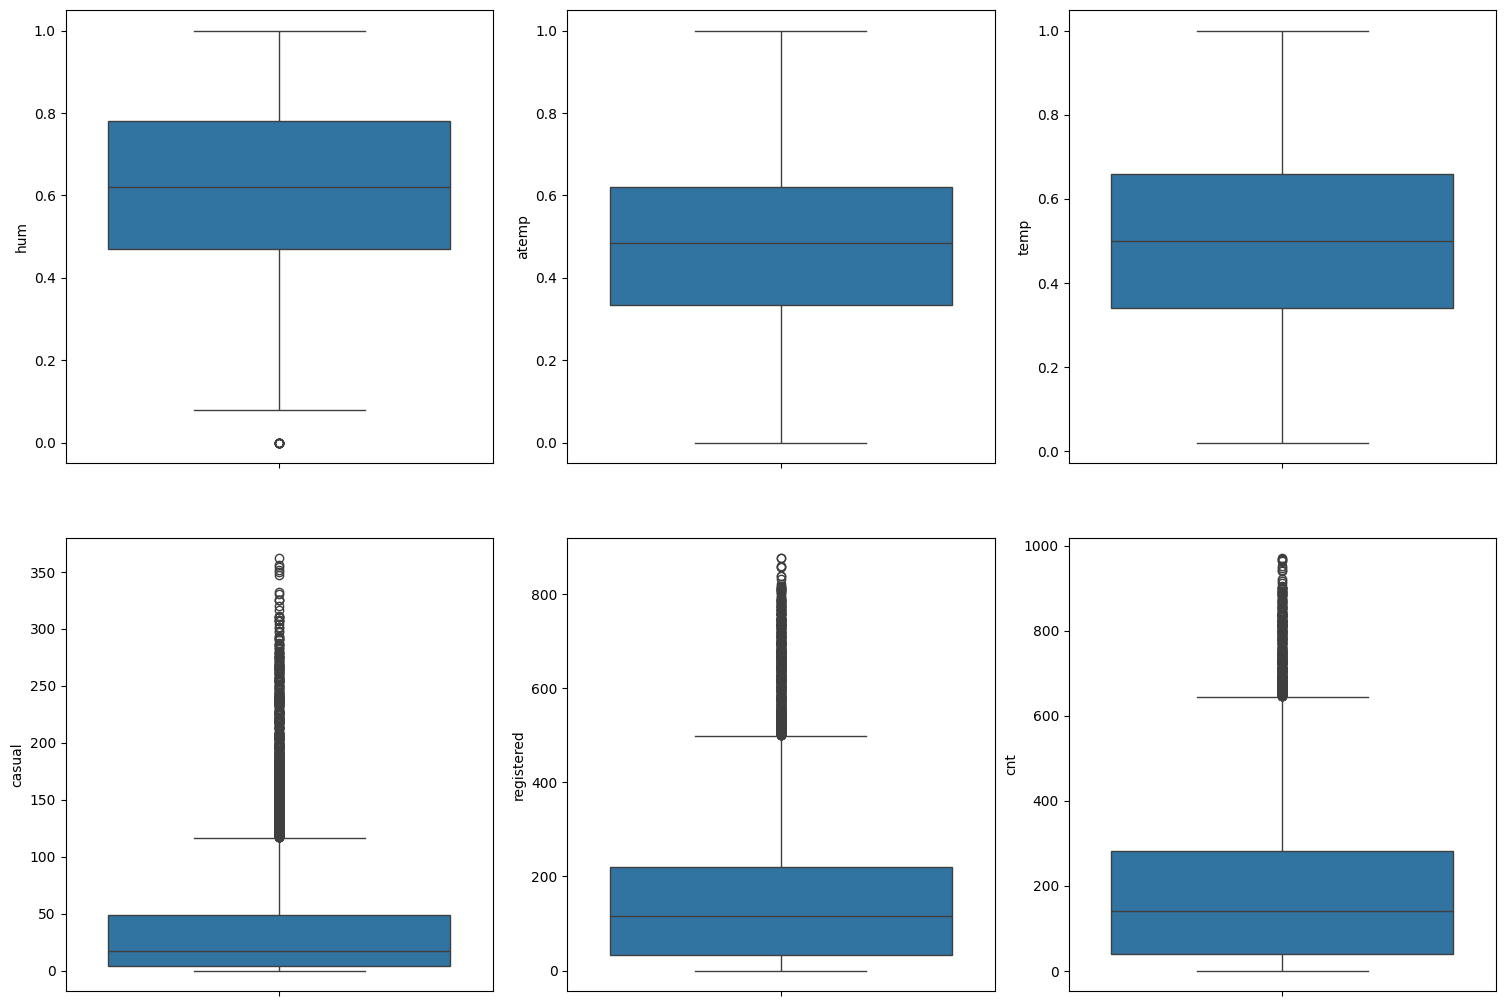

In [9]:
# Check Outliers kolom numerik
df_numerik = df.drop(['dteday','holiday','weathersit','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()

for kolom in df_numerik:
    sns.boxplot(y=kolom, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.show()

Boxplot diatas menunjukkan bahwa kolom target (`cnt`) tidak terdistribusi normal dan terdapat kelembapan (`hum`) yang memiliki nilai 0 yang berarti tidak wajar jika terjadi.

karena kolom `hum` merupakan kolom numerik maka kita dapat mengganti nilai 0 menggunakan median berdasarkan musim dan cuaca saat itu

In [10]:
df[df['hum']==0] # sebelum diganti

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,0.0,3,0,1,0.3485,0.34,23,1,26,27


In [11]:
# mengganti nilai 0 pada hum
df['hum'] = df.groupby(['season', 'weathersit'])['hum'].transform(lambda x: x.replace(0, x.median()))

In [12]:
df[df['hum']==0] # sesudah diganti

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


In [13]:
df.groupby(['season', 'weathersit'])[['hum']].transform(lambda x: x.replace(0, x.median()))

,hum
0,0.62
1,0.64
2,0.53
3,0.87
4,0.55
...,...
12160,0.75
12161,0.62
12162,0.60
12163,0.77


## Extract date

dilakukan penambahan fitur dengan mengekstrak dari kolom dteday yang bertujuan untuk mengetahui tanggal, bulan, tahun, hari, dan hari kerja sehingga dapat memperkaya fitur dalam training menggunakan machine learning

In [14]:
# Membuat kolom tanggal
df['tanggal'] = df['dteday'].dt.day

In [15]:
# Membuat kolom bulan
df['bulan'] = df['dteday'].dt.month

In [16]:
# Membuat kolom tahun
df['tahun'] = df['dteday'].dt.year

In [17]:
# Membuat kolom nama hari
df['hari'] = df['dteday'].dt.strftime('%A')

In [18]:
# membuat kolom hari kerja
df['weekday'] = 1

# Kemudian ubah nilai menjadi 0 jika 'day_name' adalah 'Saturday' atau 'Sunday'
df.loc[(df['hari'] == 'Saturday') | (df['hari'] == 'Sunday'), 'weekday'] = 0

## Feature Selection

In [19]:
# Dropping registered and casual features
df.drop(columns=['registered', 'casual'], inplace=True)

fitur registered dan casual akan dihapus karena kedua fitur tersebut merupakan sub fitur dari target (`cnt`)

In [20]:
# Dropping dateday features
df.drop(columns=['dteday'], inplace=True)

dilakukan penghapusan fitur dteday karena kolom tersebut sudah di ekstrak menjadi kolom yang baru sehingga kolom ini menjadi tidak berguna

## Modelling

In [21]:
from scipy.stats import randint, uniform
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
import category_encoders as ce 

In [22]:
# Seperate the independent variable from the target
X = df.drop(columns=['cnt'])
y = df['cnt']

In [23]:
# mapping kolom day name
mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['hari'] = df['hari'].map(mapping)

# Kolom yang akan di-ordinal encoding
ordinal_cols = ['hari']

# Transformer untuk ordinal encoding
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_cols)

In [24]:
# Memilih kolom numerik
kolom_numerik = X.select_dtypes(include=['number']).columns
kolom_numerik

Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr',
       'tanggal', 'bulan', 'tahun', 'weekday'],
      dtype='object')

In [25]:
# Transform every categorical columns into numerical
transformer = ColumnTransformer([
    ("scaling", RobustScaler(), kolom_numerik),
    ("onehot", OneHotEncoder(), ['season','tahun','bulan','tanggal','weathersit','weekday', 'hari']),
    ('ordinal', ce.BinaryEncoder(), ['hari'])
    ,
],remainder='passthrough')

In [26]:
from sklearn.model_selection import train_test_split
# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Choose a Benchmark Model**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

In [28]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# Membangun pipeline dengan ColumnTransformer dan model regresi
lg = LinearRegression(n_jobs=-1)
rd = Ridge(max_iter=1000, random_state=42)
ls = Lasso(max_iter=1000, random_state=42)
rf = RandomForestRegressor(bootstrap=False, random_state=42, n_jobs=-1)
xgb = XGBRegressor(random_state=42, n_jobs=-1)
ada = AdaBoostRegressor(random_state=42, base_estimator=DecisionTreeRegressor())

models = [lg, rd, ls, rf, xgb, ada]

# Menggunakan make_scorer untuk membuat skor sesuai metrik evaluasi yang diinginkan
scoring_rmse = 'neg_root_mean_squared_error'
scoring_mae = 'neg_mean_absolute_error'
scoring_mape = 'neg_mean_absolute_percentage_error'

# Menyiapkan data untuk dataframe
data = []

for model in models:  
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Cross-validation dengan skor sesuai metrik evaluasi yang diinginkan
    rmse_scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring=scoring_rmse, 
        error_score='raise')
    mae_scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring=scoring_mae, 
        error_score='raise')
    mape_scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring=scoring_mape, 
        error_score='raise')
    
    # Menyimpan informasi model, standar deviasi, dan rata-rata
    model_name = model.__class__.__name__
    data.append([model_name, rmse_scores.std(), rmse_scores.mean(),
                 mae_scores.std(), mae_scores.mean(),
                 mape_scores.std(), mape_scores.mean()])

# Membuat dataframe
columns = ['Model', 'RMSE Std Dev', 'RMSE Mean', 'MAE Std Dev', 'MAE Mean', 'MAPE Std Dev', 'MAPE Mean']
results_df = pd.DataFrame(data, columns=columns)

# Menampilkan dataframe
print(results_df)

                   Model  RMSE Std Dev   RMSE Mean  MAE Std Dev    MAE Mean  \
0       LinearRegression      5.121613 -141.475499     2.750794 -106.105796   
1                  Ridge      5.120818 -141.471647     2.752525 -106.104103   
2                  Lasso      5.055224 -141.653173     2.797883 -105.977915   
3  RandomForestRegressor      3.191418  -59.659633     1.029248  -35.368042   
4           XGBRegressor      1.044623  -43.276337     0.574295  -27.367605   
5      AdaBoostRegressor      1.012525  -45.310724     0.055600  -27.231705   

   MAPE Std Dev  MAPE Mean  
0      0.264722  -3.393122  
1      0.264502  -3.392696  
2      0.260540  -3.366965  
3      0.043765  -0.404688  
4      0.030487  -0.448067  
5      0.024378  -0.339446  


In [29]:
results_df

,Model,RMSE Std Dev,RMSE Mean,MAE Std Dev,MAE Mean,MAPE Std Dev,MAPE Mean
0,LinearRegression,5.121613,-141.475499,2.750794,-106.105796,0.264722,-3.393122
1,Ridge,5.120818,-141.471647,2.752525,-106.104103,0.264502,-3.392696
2,Lasso,5.055224,-141.653173,2.797883,-105.977915,0.260540,-3.366965
3,RandomForestRegressor,3.191418,-59.659633,1.029248,-35.368042,0.043765,-0.404688
4,XGBRegressor,1.044623,-43.276337,0.574295,-27.367605,0.030487,-0.448067
5,AdaBoostRegressor,1.012525,-45.310724,0.055600,-27.231705,0.024378,-0.339446


In [30]:
score_rmse = []
score_mae = []
score_mape = []

# Then predict to Datatest
xgb_model = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
    ])

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning

,RMSE,MAE,MAPE
0,43.368454,26.921892,0.448868


## Hyperparameter Tuning

In [75]:
# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_child_weight': [1, 2, 3, 4],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__gamma': [0, 1, 2]
}

In [76]:
# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

# crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 100,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

In [77]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling',
                                                                               RobustScaler(),
                                                                               Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr',
       'tanggal', 'bulan', 'tahun', 'weekday'],
      dtype='object')),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['season',
                                                                                'tahun',
                                                                                'bulan',
                                                                                'tanggal',
                                                                                'weathersit',
                                                                                'weekda...
                                        'model__gamma': [0, 1, 2],
                                        'model__learning_rate': [0.01, 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [3, 4, 5, 6],
                                        'model__min_child_weight': [1, 2, 3, 4],
                                        'model__n_estimators': [50, 100, 150,
                                                                200],
                                        'model__subsample': [0.8, 0.9, 1.0]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [78]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__min_child_weight,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
40,0.266622,0.024140,0.049289,0.016286,1.0,200,3,6,0.2,0,...,0.455786,2,-0.466591,-0.504108,-0.446956,-0.432613,-0.395231,-0.449100,0.036084,7
92,0.248810,0.013990,0.034729,0.004720,0.8,200,3,6,0.2,0,...,0.405034,4,-0.518016,-0.491950,-0.444579,-0.457468,-0.407956,-0.463994,0.038104,11
44,0.216115,0.009569,0.037722,0.015352,0.9,150,1,6,0.2,0,...,0.404339,5,-0.479191,-0.584052,-0.450825,-0.465892,-0.452716,-0.486535,0.049817,13
11,0.284458,0.017231,0.049238,0.011087,1.0,200,4,6,0.2,1,...,0.324864,3,-0.496822,-0.518781,-0.439843,-0.433579,-0.377601,-0.453325,0.049965,10
98,0.251054,0.057464,0.026472,0.006013,1.0,200,1,6,0.1,0,...,0.327229,1,-0.447588,-0.448493,-0.387782,-0.418717,-0.364596,-0.413435,0.033066,2


In [89]:
# Print the best parameters that output the best score
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -41.82724649800995
Best_params: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__min_child_weight': 3, 'model__max_depth': 6, 'model__learning_rate': 0.2, 'model__gamma': 0, 'model__colsample_bytree': 1.0}


In [80]:
# Model XGB

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Print the values of metrics from RMSE, MAE & MAPE after being tuned
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
xgb
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=['xgb'])
score_after_tuning

,RMSE,MAE,MAPE
xgb,41.953295,25.687218,0.436473


In [81]:
score_before_tuning

,RMSE,MAE,MAPE
0,43.368454,26.921892,0.448868


In [82]:
score_after_tuning

,RMSE,MAE,MAPE
xgb,41.953295,25.687218,0.436473


## Residual Plot

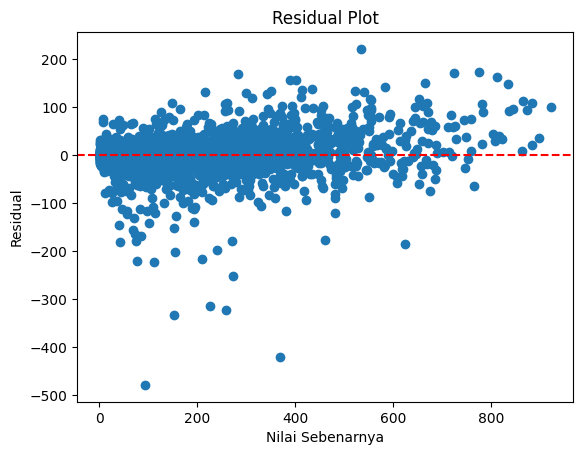

In [83]:
# Menampilkan residual
residuals = y_test - y_pred_xgb_tuning
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residual')
plt.show()

## Actual vs Prediction

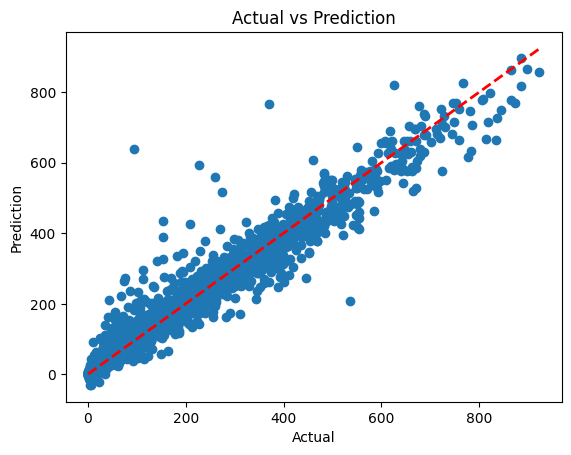

In [67]:
# Menampilkan plot actual vs prediction
plt.scatter(y_test, y_pred_xgb_tuning)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Garis diagonal
plt.title('Actual vs Prediction')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

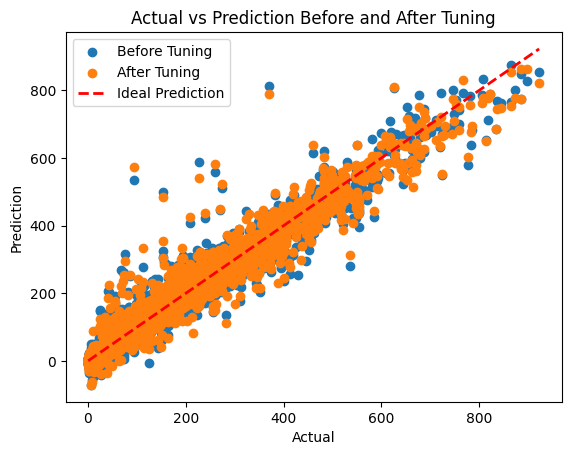

In [100]:
plt.scatter(y_test, y_pred, label='Before Tuning')
plt.scatter(y_test, y_pred_xgb_tuning, label='After Tuning')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Prediction')
plt.title('Actual vs Prediction Before and After Tuning')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()


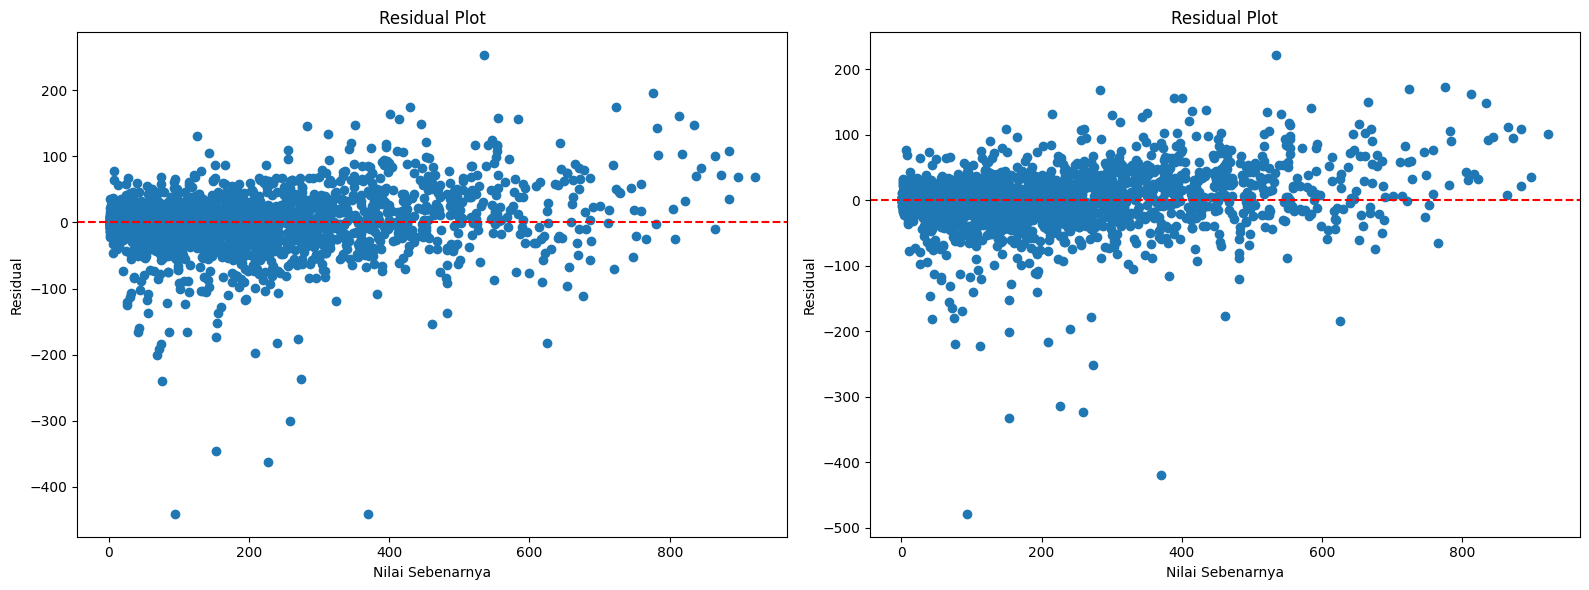

In [106]:
residuals_before_tuning = y_test - y_pred
residuals_after_tuning = y_test - y_pred_xgb_tuning

# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_before_tuning)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_after_tuning)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


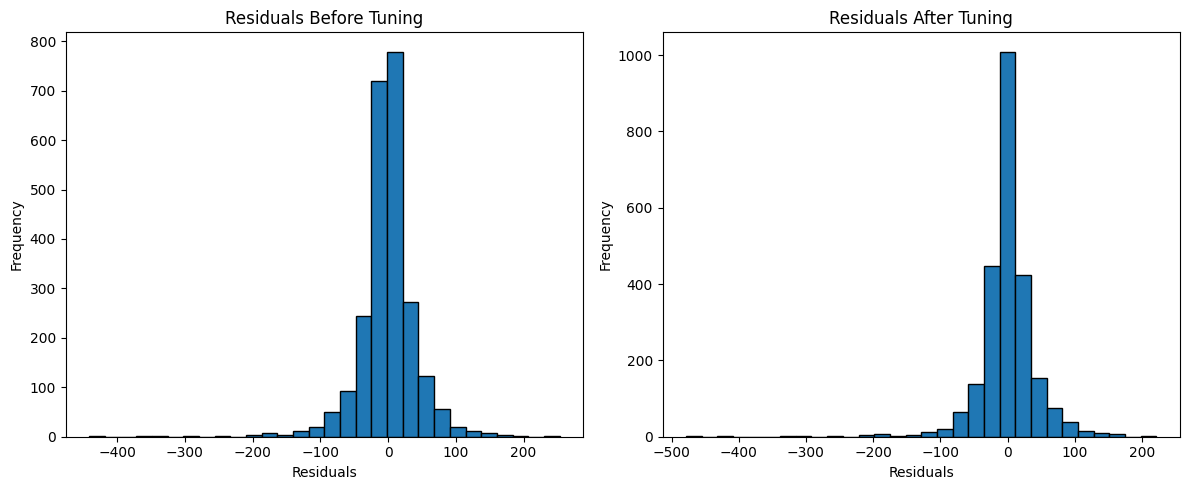

In [107]:
residuals_before_tuning = y_test - y_pred
residuals_after_tuning = y_test - y_pred_xgb_tuning

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals_before_tuning, bins=30, edgecolor='black')
plt.title('Residuals Before Tuning')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(residuals_after_tuning, bins=30, edgecolor='black')
plt.title('Residuals After Tuning')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [113]:

# Plot feature importances
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).reset_index().rename(columns={'index' : 'Feature', 0 : 'Importance'})
Top5_feature = feature_imp.sort_values('Importance',ascending=False).head(5)
Top5_feature

,Feature,Importance
10,scaling__weekday,0.211006
9,scaling__tahun,0.149362
6,scaling__hr,0.133754
5,scaling__temp,0.103687
3,scaling__season,0.059126


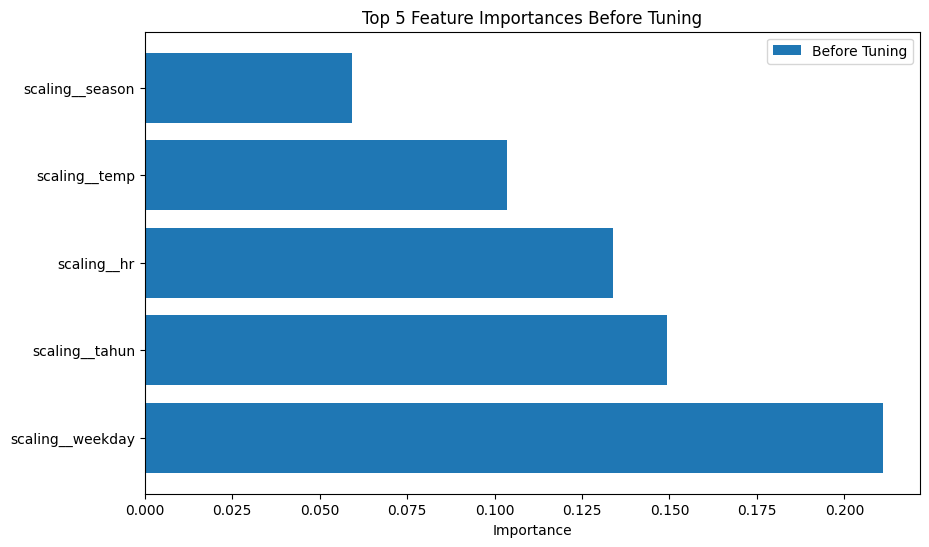

In [114]:
plt.figure(figsize=(10, 6))
plt.barh(Top5_feature['Feature'], Top5_feature['Importance'], label='Before Tuning')
plt.title('Top 5 Feature Importances Before Tuning')
plt.xlabel('Importance')
plt.legend()
plt.show()